In [40]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [41]:
from csv import reader
# open file in read mode
data = []
with open('datareg.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        #print(type(row))
        #row = row.split(',')
        data.append(row)
        # row variable is a list that represents a row in csv
        #print(row)

#data = csv_reader
#print(type(data))
sim = []
for row in data:
    #print(row)
    row = [float(i) for i in row]
    #row = row.split(',')
    sim.append(row)
    #print(row)
    
sim = np.asarray(sim)

fos = []
data = []
with open('datafos.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        data.append(row)
for row in data:
    row = [float(i) for i in row]
    fos.append(row)
    
fos = np.asarray(fos)

In [42]:
df = pd.DataFrame({'id': sim[:, 0], 'snapid': sim[:, 1], 'uid': sim[:, 2], 'x': sim[:, 3], 'y': sim[:, 4], 'z': sim[:, 5], 'x_pixel':sim[:, 6], 'y_pixel': sim[:, 7],  'M500': sim[:, 9], 'r500': sim[:, 10], 'T': sim[:, 13], 'L': sim[:,14], 'cshift': sim[:,17], 'm_rel': sim[:,16]})
df


#fossils: mass, lum
df3 = pd.DataFrame({'id': fos[:, 0], 'snapid': fos[:, 1], 'uid': fos[:, 2], 'x': fos[:, 3], 'y': fos[:, 4], 'z': fos[:, 5], 'x_pixel':fos[:, 6], 'y_pixel': fos[:, 7],  'M500': fos[:, 9], 'r500': fos[:, 10], 'T': fos[:, 13], 'L': fos[:,14], 'cshift': fos[:,17], 'm_rel': fos[:,16]})
df3

,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.720,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.530,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
2,1918388.0,40.0,983.0,306459.38,367003.44,496105.840,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
3,1918036.0,40.0,631.0,563169.62,382285.56,559262.060,14417.0,6597.0,1.357610e+14,726.595,2.86142,0.802459,0.0,0.074875
4,1917584.0,40.0,179.0,349368.22,85970.25,395229.410,8943.0,14183.0,1.362370e+14,727.441,2.46269,55.291300,0.0,0.122719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1917427.0,40.0,22.0,473268.03,264302.94,253147.390,12115.0,9617.0,6.066010e+14,1196.780,6.91691,13.237900,0.0,0.066657
360,1917424.0,40.0,19.0,480193.66,190886.75,587002.560,12292.0,11497.0,6.070700e+14,1197.090,6.60497,18.597300,0.0,0.153430
361,1917409.0,40.0,4.0,178298.31,430851.94,432679.380,4564.0,5354.0,6.154170e+14,1202.530,7.64852,21.879200,0.0,0.141778
362,1917406.0,40.0,1.0,456685.88,220515.31,279058.440,11691.0,10738.0,7.909670e+14,1307.450,7.76548,18.747100,0.0,0.110402


In [43]:
df2 = df[(df['M500']<=(1.2e+15))]
#df = df2
df4 = df3[(df3['M500']<=(1.2e+15))]

In [44]:
df = df2
df3 = df4

Text(0, 0.5, 'T, kelvin')

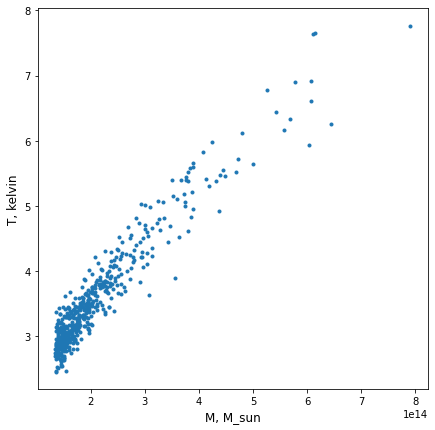

In [45]:
plt.figure(figsize = (7, 7))
plt.plot(df['M500'], df['T'], '.')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('T, kelvin', fontsize=12)
#plt.yscale('log')
#plt.xscale('log')

In [46]:
#df2 = df[(df['m_rel']<=(1/4.5))]

<IPython.core.display.Javascript object>


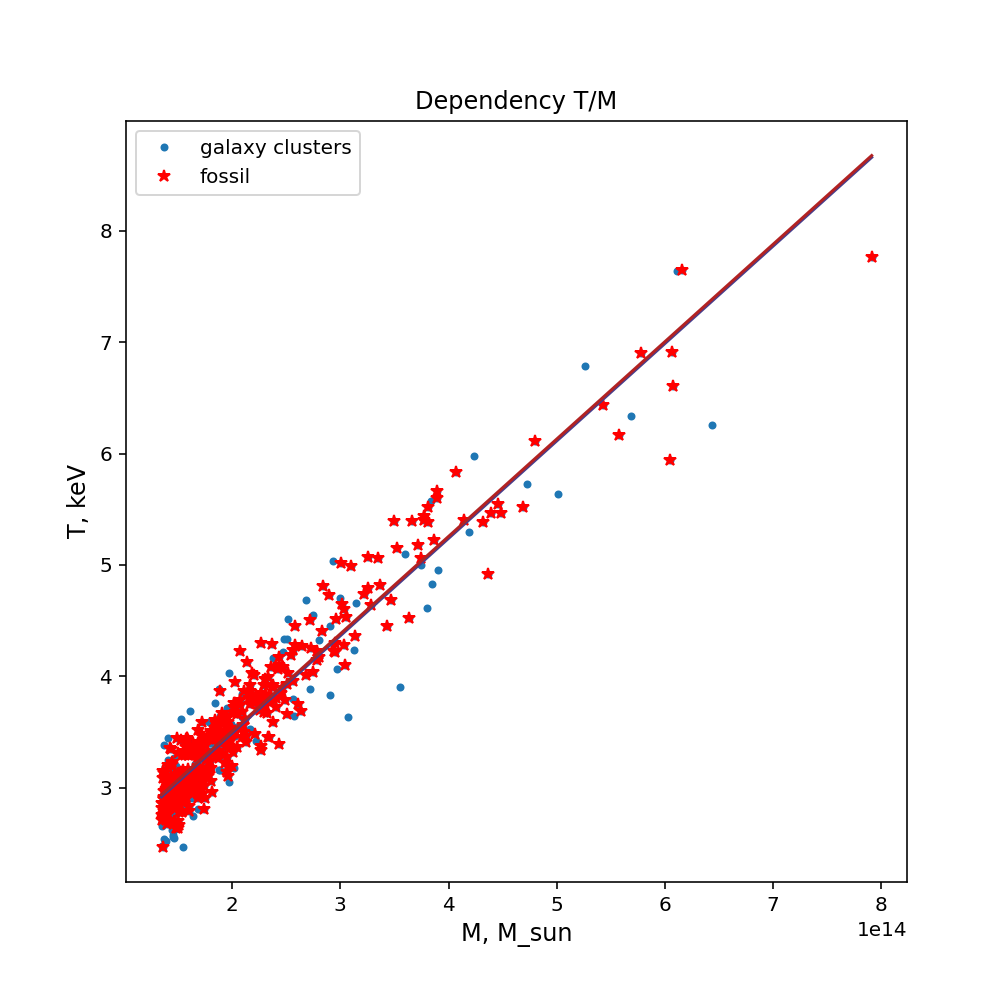

In [47]:
%matplotlib notebook

plt.figure(figsize = (7, 7))
plt.plot(df['M500'], df['T'], '.', label = 'galaxy clusters')
plt.plot(df3['M500'], df3['T'], '*', color = 'red', label = 'fossil')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('T, keV', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency T/M')
plt.plot(np.unique(df['M500']), np.poly1d(np.polyfit(df['M500'], df['T'], 1))(np.unique(df['M500'])), color = 'darkslateblue')
plt.plot(np.unique(df3['M500']), np.poly1d(np.polyfit(df3['M500'], df3['T'], 1))(np.unique(df3['M500'])), color = 'firebrick')

In [48]:
n = []
for i in df['id']:
    for j in df3['id']:
        if i==j:
            n.append(i)
len(n)

363

In [49]:
#only L approz 44
lum_sort = []
data = []
with open('lum_44.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        data.append(row)
for row in data:
    row = [float(i) for i in row]
    lum_sort.append(row)
    
lum_sort = np.asarray(lum_sort)

In [75]:
df2 = pd.DataFrame({'id': lum_sort[:, 0], 'snapid': lum_sort[:, 1], 'uid': lum_sort[:, 2], 'x': lum_sort[:, 3], 'y': lum_sort[:, 4], 'z': lum_sort[:, 5], 'x_pixel':lum_sort[:, 6], 'y_pixel': lum_sort[:, 7],  'M500': lum_sort[:, 9], 'r500': lum_sort[:, 10], 'T': lum_sort[:, 13], 'L': lum_sort[:,14], 'cshift': lum_sort[:,17], 'm_rel': lum_sort[:,16]})
print(min(df2['M500']))
df2

7040300000000.0


,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1917405.0,40.0,0.0,415982.380,455860.09,72014.406,10649.0,4713.0,1.284950e+15,1537.010,11.336600,98.571000,0.0,0.079003
1,1917406.0,40.0,1.0,456685.880,220515.31,279058.440,11691.0,10738.0,7.909670e+14,1307.450,7.765480,18.747100,0.0,0.110402
2,1917407.0,40.0,2.0,604041.000,354517.62,490770.030,15463.0,7308.0,4.397120e+14,1075.060,5.468790,6.845460,0.0,0.143774
3,1917409.0,40.0,4.0,178298.310,430851.94,432679.380,4564.0,5354.0,6.154170e+14,1202.530,7.648520,21.879200,0.0,0.141778
4,1917410.0,40.0,5.0,546745.750,317639.69,321853.620,13996.0,8252.0,6.043520e+14,1195.280,5.942090,12.601100,0.0,0.116570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,1967118.0,40.0,56590.0,211870.250,143001.56,160518.030,5423.0,12723.0,7.572290e+12,277.613,0.500336,0.006072,0.0,0.007889
32360,1967119.0,40.0,56591.0,275445.750,491151.88,15509.045,7051.0,3810.0,8.840530e+12,292.329,0.458698,0.003473,0.0,0.174409
32361,1967120.0,40.0,56593.0,79843.094,289409.19,103488.980,2043.0,8975.0,8.424860e+12,287.677,0.592011,0.005767,0.0,0.073226
32362,1967121.0,40.0,56595.0,168322.800,401984.25,402579.840,4309.0,6093.0,7.928330e+12,281.899,0.361141,0.010370,0.0,0.118105


In [76]:
df2 = df[(df2['M500'] >= (10^14))]
print(min(df2['M500']))
df2

134856000000000.0


<ipython-input-76-1d9fce654398>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[(df2['M500'] >= (10^14))]


,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
2,1918124.0,40.0,719.0,190477.06,327964.16,313990.31,4876.0,7988.0,1.350940e+14,725.404,2.75327,0.900185,0.0,0.381065
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
4,1917983.0,40.0,578.0,451015.94,278870.69,149074.41,11546.0,9244.0,1.352690e+14,725.720,2.47629,0.817761,0.0,0.259943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1917424.0,40.0,19.0,480193.66,190886.75,587002.56,12292.0,11497.0,6.070700e+14,1197.090,6.60497,18.597300,0.0,0.153430
493,1917413.0,40.0,8.0,369588.50,354038.38,363193.31,9461.0,7320.0,6.107190e+14,1199.440,7.64244,17.644600,0.0,0.246785
494,1917409.0,40.0,4.0,178298.31,430851.94,432679.38,4564.0,5354.0,6.154170e+14,1202.530,7.64852,21.879200,0.0,0.141778
495,1917411.0,40.0,6.0,233221.94,441522.84,452581.88,5970.0,5081.0,6.436800e+14,1220.650,6.25241,12.558800,0.0,0.241740


In [77]:
df4 = df[(df2['m_rel']<=(1/4.5))]
df4


,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
6,1918036.0,40.0,631.0,563169.62,382285.56,559262.06,14417.0,6597.0,1.357610e+14,726.595,2.86142,0.802459,0.0,0.074875
8,1917584.0,40.0,179.0,349368.22,85970.25,395229.41,8943.0,14183.0,1.362370e+14,727.441,2.46269,55.291300,0.0,0.122719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1917410.0,40.0,5.0,546745.75,317639.69,321853.62,13996.0,8252.0,6.043520e+14,1195.280,5.94209,12.601100,0.0,0.116570
491,1917427.0,40.0,22.0,473268.03,264302.94,253147.39,12115.0,9617.0,6.066010e+14,1196.780,6.91691,13.237900,0.0,0.066657
492,1917424.0,40.0,19.0,480193.66,190886.75,587002.56,12292.0,11497.0,6.070700e+14,1197.090,6.60497,18.597300,0.0,0.153430
494,1917409.0,40.0,4.0,178298.31,430851.94,432679.38,4564.0,5354.0,6.154170e+14,1202.530,7.64852,21.879200,0.0,0.141778


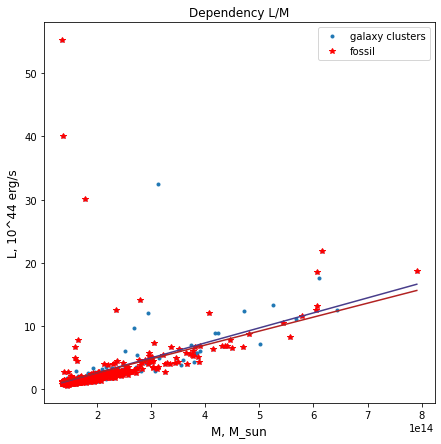

In [78]:
%matplotlib inline

plt.figure(figsize = (7, 7))
plt.plot(df2['M500'], df2['L'], '.', label = 'galaxy clusters')
plt.plot(df4['M500'], df4['L'], '*', color = 'red', label = 'fossil')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('L, 10^44 erg/s', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency L/M')
plt.plot(np.unique(df2['M500']), np.poly1d(np.polyfit(df2['M500'], df2['L'], 1))(np.unique(df2['M500'])), color = 'darkslateblue')
plt.plot(np.unique(df4['M500']), np.poly1d(np.polyfit(df4['M500'], df4['L'], 1))(np.unique(df4['M500'])), color = 'firebrick')
#plt.ylim(0,30)
#plt.yscale('log')
#plt.xscale('log')

In [90]:
#отсеиватель
df6 = df2.copy()
relation = []
for i in range(len(df6['L'])):
    rel = (df6['L'][i])/(df6['M500'][i])
    relation.append(rel)

In [91]:
#df6.insert(14, 'L-M', relation, allow_duplicates = False)
df6['M-L'] = relation

df6

,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel,M-L
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006,6.156241e-15
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571,8.974501e-15
2,1918124.0,40.0,719.0,190477.06,327964.16,313990.31,4876.0,7988.0,1.350940e+14,725.404,2.75327,0.900185,0.0,0.381065,6.663397e-15
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794,9.816685e-15
4,1917983.0,40.0,578.0,451015.94,278870.69,149074.41,11546.0,9244.0,1.352690e+14,725.720,2.47629,0.817761,0.0,0.259943,6.045443e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1917424.0,40.0,19.0,480193.66,190886.75,587002.56,12292.0,11497.0,6.070700e+14,1197.090,6.60497,18.597300,0.0,0.153430,3.063452e-14
493,1917413.0,40.0,8.0,369588.50,354038.38,363193.31,9461.0,7320.0,6.107190e+14,1199.440,7.64244,17.644600,0.0,0.246785,2.889152e-14
494,1917409.0,40.0,4.0,178298.31,430851.94,432679.38,4564.0,5354.0,6.154170e+14,1202.530,7.64852,21.879200,0.0,0.141778,3.555183e-14
495,1917411.0,40.0,6.0,233221.94,441522.84,452581.88,5970.0,5081.0,6.436800e+14,1220.650,6.25241,12.558800,0.0,0.241740,1.951094e-14


In [93]:
df6

,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
2,1918124.0,40.0,719.0,190477.06,327964.16,313990.31,4876.0,7988.0,1.350940e+14,725.404,2.75327,0.900185,0.0,0.381065
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
4,1917983.0,40.0,578.0,451015.94,278870.69,149074.41,11546.0,9244.0,1.352690e+14,725.720,2.47629,0.817761,0.0,0.259943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1917410.0,40.0,5.0,546745.75,317639.69,321853.62,13996.0,8252.0,6.043520e+14,1195.280,5.94209,12.601100,0.0,0.116570
491,1917427.0,40.0,22.0,473268.03,264302.94,253147.39,12115.0,9617.0,6.066010e+14,1196.780,6.91691,13.237900,0.0,0.066657
493,1917413.0,40.0,8.0,369588.50,354038.38,363193.31,9461.0,7320.0,6.107190e+14,1199.440,7.64244,17.644600,0.0,0.246785
495,1917411.0,40.0,6.0,233221.94,441522.84,452581.88,5970.0,5081.0,6.436800e+14,1220.650,6.25241,12.558800,0.0,0.241740


In [92]:
df6 = df[(df6['M-L']<=(3e-14))]
df6

,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
2,1918124.0,40.0,719.0,190477.06,327964.16,313990.31,4876.0,7988.0,1.350940e+14,725.404,2.75327,0.900185,0.0,0.381065
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
4,1917983.0,40.0,578.0,451015.94,278870.69,149074.41,11546.0,9244.0,1.352690e+14,725.720,2.47629,0.817761,0.0,0.259943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1917410.0,40.0,5.0,546745.75,317639.69,321853.62,13996.0,8252.0,6.043520e+14,1195.280,5.94209,12.601100,0.0,0.116570
491,1917427.0,40.0,22.0,473268.03,264302.94,253147.39,12115.0,9617.0,6.066010e+14,1196.780,6.91691,13.237900,0.0,0.066657
493,1917413.0,40.0,8.0,369588.50,354038.38,363193.31,9461.0,7320.0,6.107190e+14,1199.440,7.64244,17.644600,0.0,0.246785
495,1917411.0,40.0,6.0,233221.94,441522.84,452581.88,5970.0,5081.0,6.436800e+14,1220.650,6.25241,12.558800,0.0,0.241740


In [87]:
df8 = df6.copy()
df8 = df[(df8['m_rel']<=(1/4.5))]
df8

,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
6,1918036.0,40.0,631.0,563169.62,382285.56,559262.06,14417.0,6597.0,1.357610e+14,726.595,2.86142,0.802459,0.0,0.074875
8,1917584.0,40.0,179.0,349368.22,85970.25,395229.41,8943.0,14183.0,1.362370e+14,727.441,2.46269,55.291300,0.0,0.122719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1917410.0,40.0,5.0,546745.75,317639.69,321853.62,13996.0,8252.0,6.043520e+14,1195.280,5.94209,12.601100,0.0,0.116570
491,1917427.0,40.0,22.0,473268.03,264302.94,253147.39,12115.0,9617.0,6.066010e+14,1196.780,6.91691,13.237900,0.0,0.066657
492,1917424.0,40.0,19.0,480193.66,190886.75,587002.56,12292.0,11497.0,6.070700e+14,1197.090,6.60497,18.597300,0.0,0.153430
494,1917409.0,40.0,4.0,178298.31,430851.94,432679.38,4564.0,5354.0,6.154170e+14,1202.530,7.64852,21.879200,0.0,0.141778


In [88]:
df8

,id,snapid,uid,x,y,z,x_pixel,y_pixel,M500,r500,T,L,cshift,m_rel
0,1918145.0,40.0,740.0,290449.78,186652.59,186311.72,7435.0,11605.0,1.348560e+14,724.998,2.81309,0.830206,0.0,0.047006
1,1918035.0,40.0,630.0,333890.38,256570.91,277428.53,8547.0,9815.0,1.349490e+14,725.165,2.70641,1.211100,0.0,0.158571
3,1918388.0,40.0,983.0,306459.38,367003.44,496105.84,7845.0,6988.0,1.352320e+14,725.660,2.75393,1.327530,0.0,0.055794
6,1918036.0,40.0,631.0,563169.62,382285.56,559262.06,14417.0,6597.0,1.357610e+14,726.595,2.86142,0.802459,0.0,0.074875
8,1917584.0,40.0,179.0,349368.22,85970.25,395229.41,8943.0,14183.0,1.362370e+14,727.441,2.46269,55.291300,0.0,0.122719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1917410.0,40.0,5.0,546745.75,317639.69,321853.62,13996.0,8252.0,6.043520e+14,1195.280,5.94209,12.601100,0.0,0.116570
491,1917427.0,40.0,22.0,473268.03,264302.94,253147.39,12115.0,9617.0,6.066010e+14,1196.780,6.91691,13.237900,0.0,0.066657
492,1917424.0,40.0,19.0,480193.66,190886.75,587002.56,12292.0,11497.0,6.070700e+14,1197.090,6.60497,18.597300,0.0,0.153430
494,1917409.0,40.0,4.0,178298.31,430851.94,432679.38,4564.0,5354.0,6.154170e+14,1202.530,7.64852,21.879200,0.0,0.141778


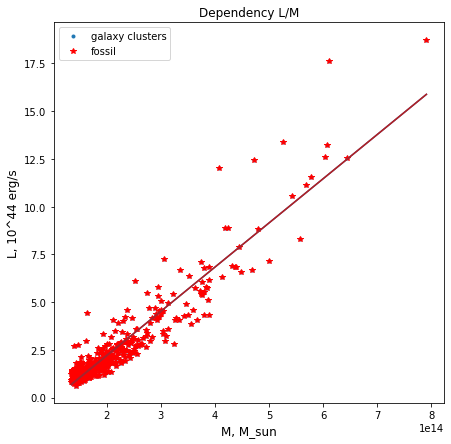

In [66]:
%matplotlib inline

plt.figure(figsize = (7, 7))
plt.plot(df6['M500'], df6['L'], '.', label = 'galaxy clusters')
plt.plot(df8['M500'], df8['L'], '*', color = 'red', label = 'fossil')
plt.xlabel('M, M_sun',fontsize=12)
plt.ylabel('L, 10^44 erg/s', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency L/M')
plt.plot(np.unique(df6['M500']), np.poly1d(np.polyfit(df6['M500'], df6['L'], 1))(np.unique(df6['M500'])), color = 'darkslateblue')
plt.plot(np.unique(df8['M500']), np.poly1d(np.polyfit(df8['M500'], df8['L'], 1))(np.unique(df8['M500'])), color = 'firebrick')
#plt.ylim(0,30)
#plt.yscale('log')
#plt.xscale('log')

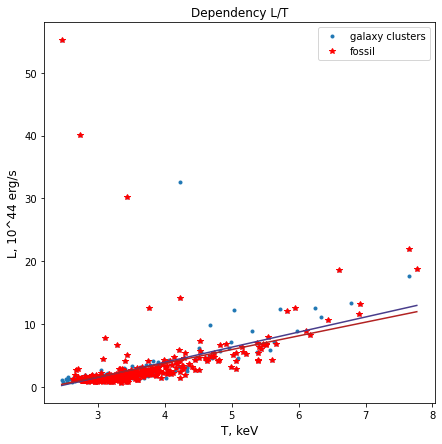

In [38]:
%matplotlib inline

plt.figure(figsize = (7, 7))
plt.plot(df2['T'], df2['L'], '.', label = 'galaxy clusters')
plt.plot(df4['T'], df4['L'], '*', color = 'red', label = 'fossil')
plt.xlabel('T, keV',fontsize=12)
plt.ylabel('L, 10^44 erg/s', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency L/T')
plt.plot(np.unique(df2['T']), np.poly1d(np.polyfit(df2['T'], df2['L'], 1))(np.unique(df2['T'])), color = 'darkslateblue')
plt.plot(np.unique(df4['T']), np.poly1d(np.polyfit(df4['T'], df4['L'], 1))(np.unique(df4['T'])), color = 'firebrick')
#plt.#ylim(0,30)

(0.0, 10.0)

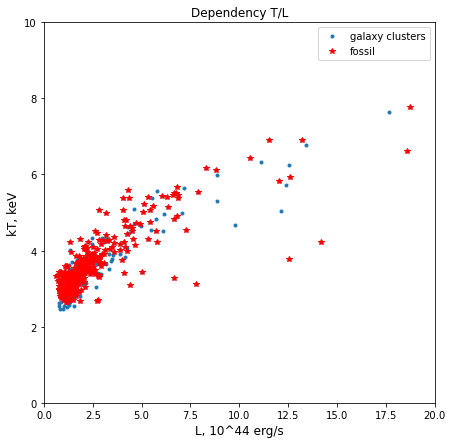

In [117]:
%matplotlib inline

plt.figure(figsize = (7, 7))
plt.plot(df2['L'], df2['T'], '.', label = 'galaxy clusters')
plt.plot(df4['L'], df4['T'], '*', color = 'red', label = 'fossil')
plt.ylabel('kT, keV',fontsize=12)
plt.xlabel('L, 10^44 erg/s', fontsize=12)
plt.legend (loc = 'best')
plt.title ('Dependency T/L')
#plt.plot(np.unique(df2['L']), np.poly1d(np.polyfit(df2['L'], df2['T'], 1))(np.unique(df2['L'])), color = 'darkslateblue')
#plt.plot(np.unique(df4['L']), np.poly1d(np.polyfit(df4['L'], df4['T'], 1))(np.unique(df4['L'])), color = 'firebrick')
plt.xlim(0,20)
plt.ylim(0,10)